In [1]:
import sys

sys.path.insert(0, '..')

## Setup the model area

In [2]:
from morpheus.project.types.discretization import SpatialDiscretization
from morpheus.project.types.discretization.spatial import Rotation, Grid, Crs
from morpheus.project.types.geometry import Polygon, LineString

polygon = Polygon(
  type='Polygon',
  coordinates=[[
    (13.92, 50.964),
    (13.92, 50.966),
    (13.925, 50.966),
    (13.925, 50.964),
    (13.92, 50.964)
  ]]
)

rotation = Rotation(0)

grid = Grid.cartesian_from_polygon(polygon=polygon, n_cols=100, n_rows=50, rotation=rotation)
spatial_discretization = SpatialDiscretization.from_geometry_with_grid(
  geometry=polygon,
  grid=grid,
  crs=Crs.from_str('EPSG:4326')
)
grid

[(0, 0)] [(99, 0)]
[(0, 1)] [(99, 1)]
[(0, 2)] [(99, 2)]
[(0, 3)] [(99, 3)]
[(0, 4)] [(99, 4)]
[(0, 5)] [(99, 5)]
[(0, 6)] [(99, 6)]
[(0, 7)] [(99, 7)]
[(0, 8)] [(99, 8)]
[(0, 9)] [(99, 9)]
[(0, 10)] [(99, 10)]
[(0, 11)] [(99, 11)]
[(0, 12)] [(99, 12)]
[(0, 13)] [(99, 13)]
[(0, 14)] [(99, 14)]
[(0, 15)] [(99, 15)]
[(0, 16)] [(99, 16)]
[(0, 17)] [(99, 17)]
[(0, 18)] [(99, 18)]
[(0, 19)] [(99, 19)]
[(0, 20)] [(99, 20)]
[(0, 21)] [(99, 21)]
[(0, 22)] [(99, 22)]
[(0, 23)] [(99, 23)]
[(0, 24)] [(99, 24)]
[(0, 25)] [(99, 25)]
[(0, 26)] [(99, 26)]
[(0, 27)] [(99, 27)]
[(0, 28)] [(99, 28)]
[(0, 29)] [(99, 29)]
[(0, 30)] [(99, 30)]
[(0, 31)] [(99, 31)]
[(0, 32)] [(99, 32)]
[(0, 33)] [(99, 33)]
[(0, 34)] [(99, 34)]
[(0, 35)] [(99, 35)]
[(0, 36)] [(99, 36)]
[(0, 37)] [(99, 37)]
[(0, 38)] [(99, 38)]
[(0, 39)] [(99, 39)]
[(0, 40)] [(99, 40)]
[(0, 41)] [(99, 41)]
[(0, 42)] [(99, 42)]
[(0, 43)] [(99, 43)]
[(0, 44)] [(99, 44)]
[(0, 45)] [(99, 45)]
[(0, 46)] [(99, 46)]
[(0, 47)] [(99, 47)]
[(0, 48)] [(

Grid(origin=Point(coordinates=(13.920000000000002, 50.965999999999994), type='Point'), col_widths=[5.565974539662712, 5.565974539662712, 5.565974539662712, 5.565974539662712, 5.565974539662712, 5.565974539662712, 5.565974539662712, 5.565974539662712, 5.5659745396627045, 5.565974539662719, 5.565974539662712, 5.565974539662712, 5.5659745396627045, 5.565974539662719, 5.5659745396627045, 5.565974539662719, 5.565974539662719, 5.56597453966269, 5.565974539662719, 5.565974539662719, 5.5659745396627045, 5.565974539662719, 5.565974539662719, 5.5659745396627045, 5.5659745396627045, 5.5659745396627045, 5.565974539662733, 5.5659745396627045, 5.5659745396627045, 5.5659745396627045, 5.5659745396627045, 5.565974539662733, 5.5659745396627045, 5.565974539662733, 5.565974539662676, 5.5659745396627045, 5.565974539662733, 5.5659745396627045, 5.565974539662733, 5.5659745396627045, 5.565974539662676, 5.565974539662733, 5.5659745396627045, 5.565974539662733, 5.5659745396627045, 5.565974539662733, 5.565974539

## Setup Time Discretization

In [3]:
from morpheus.project.types.discretization.time.TimeUnit import TimeUnit
from morpheus.project.types.discretization.time.Stressperiods import StartDateTime, StressPeriodCollection, \
  StressPeriod, NumberOfTimeSteps, TimeStepMultiplier, IsSteadyState
from morpheus.project.types.discretization.time import TimeDiscretization
from datetime import datetime

time_discretization = TimeDiscretization(
  start_date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
  end_date_time=StartDateTime.from_datetime(datetime(2020, 12, 31)),
  stress_periods=StressPeriodCollection([
    StressPeriod(
      start_date_time=StartDateTime.from_datetime(datetime(2020, 1, 1)),
      number_of_time_steps=NumberOfTimeSteps(1),
      time_step_multiplier=TimeStepMultiplier(1),
      steady_state=IsSteadyState.yes()
    ),
  ]),
  time_unit=TimeUnit.days()
)

# Setup Model

In [4]:
from morpheus.project.types.Model import Model

model = Model.new()
model = model.with_updated_time_discretization(time_discretization)
model = model.with_updated_spatial_discretization(spatial_discretization=spatial_discretization)

In [5]:
import folium

m = folium.Map(tiles="cartodbpositron", crs="EPSG3857", zoom_start=12, location=[50.965, 13.922])
m.add_child(folium.GeoJson(polygon.as_geojson()))

m.fit_bounds(m.get_bounds())
m

# Setup drain boundary with two observations

In [6]:
from morpheus.project.types.boundaries.Observation import ObservationName
from morpheus.project.types.boundaries.DrainObservation import DrainRawDataItem, \
  DrainObservation
from morpheus.project.types.boundaries.GeneralHeadObservation import ObservationId, GeneralHeadRawDataItem, \
  GeneralHeadObservation, Stage, Conductance
from morpheus.project.types.geometry import Point
from morpheus.project.types.boundaries.Boundary import BoundaryName, BoundaryCollection
from morpheus.project.types.layers import LayerId
from morpheus.project.types.boundaries.Boundary import DrainBoundary, GeneralHeadBoundary

layers_list = [LayerId.new()]

drain_east = DrainBoundary.from_geometry(
  name=BoundaryName('drain_east'),
  geometry=LineString([
    (13.92499, 50.966),
    (13.92499, 50.964),
  ]),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  observations=[
    DrainObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92499, 50.966)),
      data=[
        DrainRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(.75),
          conductance=Conductance.from_float(100),
        ),
        DrainRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(.75),
          conductance=Conductance.from_float(100),
        ),
      ]
    ),
    DrainObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92499, 50.964)),
      data=[
        DrainRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(.5),
          conductance=Conductance.from_float(200),
        ),
        DrainRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(.5),
          conductance=Conductance.from_float(200),
        ),
      ]
    ),
  ]
)

general_head_west = GeneralHeadBoundary.from_geometry(
  name=BoundaryName('general_head_west'),
  geometry=LineString([
    (13.92004, 50.96401),
    (13.92004, 50.96599),
  ]),
  grid=grid,
  affected_layers=[model.layers[0].layer_id],
  observations=[
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92004, 50.96599)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(1),
          conductance=Conductance.from_float(300),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(1),
          conductance=Conductance.from_float(300),
        ),
      ]
    ),
    GeneralHeadObservation(
      observation_id=ObservationId.new(),
      observation_name=ObservationName.default(),
      geometry=Point((13.92004, 50.96401)),
      data=[
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2019, 1, 1)),
          stage=Stage.from_float(1),
          conductance=Conductance.from_float(400),
        ),
        GeneralHeadRawDataItem(
          date_time=StartDateTime.from_datetime(datetime(2021, 12, 31)),
          stage=Stage.from_float(1),
          conductance=Conductance.from_float(400),
        ),
      ]
    ),
  ]
)

boundary_collection = BoundaryCollection.new()
boundary_collection.add_boundary(general_head_west)
boundary_collection.add_boundary(drain_east)

model = model.with_updated_boundaries(boundaries=boundary_collection)

m.add_child(folium.GeoJson(drain_east.as_geojson()))
m.add_child(folium.GeoJson(drain_east.affected_cells.to_geojson(grid).as_geojson()))
for observation in drain_east.observations:
  m.add_child(folium.GeoJson(observation.as_geojson()))

m.add_child(folium.GeoJson(general_head_west.as_geojson()))
m.add_child(folium.GeoJson(general_head_west.affected_cells.to_geojson(grid).as_geojson()))
for observation in general_head_west.observations:
  m.add_child(folium.GeoJson(observation.as_geojson()))
m.fit_bounds(m.get_bounds())
m

In [7]:
drain_east.observations

[DrainObservation(observation_id=ObservationId(value='be0bf9c0-951e-436a-ae41-980887a0ca47'), observation_name=ObservationName(value='Observation Point 1'), geometry=Point(coordinates=(13.92499, 50.966), type='Point'), data=[DrainRawDataItem(date_time=StartDateTime(value=datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)), stage=Stage(value=0.75), conductance=Conductance(value=100)), DrainRawDataItem(date_time=StartDateTime(value=datetime.datetime(2021, 12, 31, 0, 0, tzinfo=datetime.timezone.utc)), stage=Stage(value=0.75), conductance=Conductance(value=100))]),
 DrainObservation(observation_id=ObservationId(value='1aee9f0d-93a1-4665-8400-c156907eecb1'), observation_name=ObservationName(value='Observation Point 1'), geometry=Point(coordinates=(13.92499, 50.964), type='Point'), data=[DrainRawDataItem(date_time=StartDateTime(value=datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)), stage=Stage(value=0.5), conductance=Conductance(value=200)), DrainRawDataItem

In [8]:
from morpheus.project.infrastructure.calculation.engines.modflow_2005.packages.GhbPackageMapper import \
  calculate_ghb_boundary_stress_period_data

result = calculate_ghb_boundary_stress_period_data(
  spatial_discretization=spatial_discretization,
  time_discretization=time_discretization,
  layers=model.layers,
  ghb_boundary=general_head_west,
)
result.to_dict()

{0: [[0, 0, 0, 1.0, 300.5050289789967],
  [0, 1, 0, 1.0, 302.5251892522284],
  [0, 2, 0, 1.0, 304.54535126413674],
  [0, 3, 0, 1.0, 306.5655150157982],
  [0, 4, 0, 1.0, 308.5856805068539],
  [0, 5, 0, 1.0, 310.60584773730386],
  [0, 6, 0, 1.0, 312.62601670750695],
  [0, 7, 0, 1.0, 314.6461874167454],
  [0, 8, 0, 1.0, 316.66635986573704],
  [0, 9, 0, 1.0, 318.68653405412294],
  [0, 10, 0, 1.0, 320.70670998226194],
  [0, 11, 0, 1.0, 322.72688764979523],
  [0, 12, 0, 1.0, 324.7470670563639],
  [0, 13, 0, 1.0, 326.7672482030445],
  [0, 14, 0, 1.0, 328.7874310884017],
  [0, 15, 0, 1.0, 330.80761571422977],
  [0, 16, 0, 1.0, 332.8278020790932],
  [0, 17, 0, 1.0, 334.847990182992],
  [0, 18, 0, 1.0, 336.8681800270029],
  [0, 19, 0, 1.0, 338.88837161040794],
  [0, 20, 0, 1.0, 340.90856493284844],
  [0, 21, 0, 1.0, 342.9287599954009],
  [0, 22, 0, 1.0, 344.9489567969888],
  [0, 23, 0, 1.0, 346.9691553383298],
  [0, 24, 0, 1.0, 348.9893556187062],
  [0, 25, 0, 1.0, 351.0095576388357],
  [0, 26, 

In [9]:
from morpheus.project.infrastructure.calculation.engines.modflow_2005.packages.DrnPackageMapper import \
  calculate_drn_boundary_stress_period_data

result = calculate_drn_boundary_stress_period_data(
  spatial_discretization=spatial_discretization,
  time_discretization=time_discretization,
  layers=model.layers,
  drn_boundary=drain_east,
)
result.to_dict()

{0: [[0, 0, 99, 0.7475000532765921, 100.99997868936319],
  [0, 1, 99, 0.7425001566003594, 102.99993735985626],
  [0, 2, 99, 0.7375002556209023, 104.99989775163911],
  [0, 3, 99, 0.7325003503355562, 106.99985986577755],
  [0, 4, 99, 0.7275004407452093, 108.99982370191631],
  [0, 5, 99, 0.7225005268498615, 110.9997892600554],
  [0, 6, 99, 0.7175006086486249, 112.99975654055007],
  [0, 7, 99, 0.7125006861432756, 114.99972554268979],
  [0, 8, 99, 0.7075007593320373, 116.9996962671851],
  [0, 9, 99, 0.7025008282157982, 118.99966871368073],
  [0, 10, 99, 0.6975008927936701, 120.99964288253196],
  [0, 11, 99, 0.6925009530665412, 122.9996187733835],
  [0, 12, 99, 0.6875010090352998, 124.9995963858801],
  [0, 13, 99, 0.6825010606972811, 126.99957572108755],
  [0, 14, 99, 0.677501108056038, 128.9995567775848],
  [0, 15, 99, 0.6725011511071296, 130.99953955714815],
  [0, 16, 99, 0.6675011898541086, 132.99952405835657],
  [0, 17, 99, 0.6625012242969749, 134.99951028121004],
  [0, 18, 99, 0.6575012

## Calculate

In [10]:
from morpheus.project.infrastructure.calculation.engines.base.CalculationEngineFactory import CalculationEngineFactory
from morpheus.project.types.calculation.CalculationProfile import CalculationProfile, CalculationEngineType
from morpheus.project.types.calculation.Calculation import CalculationId

calculation_id = CalculationId.new()
calculation_profile = CalculationProfile.new(CalculationEngineType.MF2005)
engine = CalculationEngineFactory.create_engine(calculation_id=calculation_id, engine_type=calculation_profile.engine_type)
check_model_log = engine.preprocess(model, calculation_profile)
check_model_log.to_list()

['type,package,k,i,j,value,desc']

In [11]:
log, result = engine.run(model=model, calculation_profile=calculation_profile)

FloPy is using the following executable to run the model: ../../../../../../../src/backend/.venv/bin/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mf2005.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2024/08/19 22:03:43

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2024/08/19 22:03:43
 Elapsed run time:  0.027 Seconds

  Normal termination of simulation


In [12]:
result

CalculationResult(type=<CalculationResultType.SUCCESS: 'success'>, message='Calculation finished successfully', files=['mf2005.list', 'mf2005.ghb', 'mf2005.drn', 'mf2005.dis', 'mf2005.nam', 'mf2005.bas', 'mf2005.lpf', 'mf2005.pcg', 'mf2005.oc', 'mf2005.hds'], flow_head_results=AvailableResults(times=[365.0], kstpkper=[(0, 0)], number_of_layers=1, number_of_observations=0, min_value=0.5026057362556458, max_value=0.9999876022338867), flow_drawdown_results=None, flow_budget_results=AvailableResults(times=[365.0], kstpkper=[(0, 0)], number_of_layers=0, number_of_observations=0, min_value=None, max_value=None), transport_concentration_results=None, transport_budget_results=None, packages=['DIS', 'BAS6', 'DRN', 'GHB', 'PCG', 'LPF', 'OC'])

In [13]:
head = engine.read_flow_head(idx=0, layer=0)

In [14]:
import simplejson as json

json = json.dumps(head, ignore_nan=True)
json

'[[1.0, 0.9962000250816345, 0.9923999905586243, 0.9886999726295471, 0.9848999977111816, 0.9811000227928162, 0.977400004863739, 0.9735999703407288, 0.9697999954223633, 0.9660999774932861, 0.9623000025749207, 0.9585000276565552, 0.954800009727478, 0.9509999752044678, 0.9473000168800354, 0.9434999823570251, 0.9398000240325928, 0.9359999895095825, 0.9322999715805054, 0.9284999966621399, 0.9247999787330627, 0.9211000204086304, 0.9172999858856201, 0.9136000275611877, 0.9099000096321106, 0.9061999917030334, 0.9024999737739563, 0.8988000154495239, 0.8950999975204468, 0.8913999795913696, 0.8877000212669373, 0.8840000033378601, 0.880299985408783, 0.8766999840736389, 0.8730000257492065, 0.8694000244140625, 0.8657000064849854, 0.8621000051498413, 0.8585000038146973, 0.8549000024795532, 0.8513000011444092, 0.8476999998092651, 0.8440999984741211, 0.8406000137329102, 0.8370000123977661, 0.8335000276565552, 0.8299999833106995, 0.8264999985694885, 0.8230000138282776, 0.8195000290870667, 0.8159999847412

In [15]:
engine.read_flow_drawdown(idx=0, layer=0)

[]

In [16]:
engine.read_flow_budget(idx=0, incremental=False)

{'STORAGE_IN': 0.0,
 'CONSTANT_HEAD_IN': 0.0,
 'DRAINS_IN': 0.0,
 'HEAD_DEP_BOUNDS_IN': 88.9888,
 'TOTAL_IN': 88.9888,
 'STORAGE_OUT': -0.0,
 'CONSTANT_HEAD_OUT': -0.0,
 'DRAINS_OUT': -88.9949,
 'HEAD_DEP_BOUNDS_OUT': -0.0,
 'TOTAL_OUT': -88.9949,
 'IN-OUT': -0.0061035,
 'PERCENT_DISCREPANCY': -0.01,
 'tslen': 365.0}

In [17]:
engine.read_flow_budget(idx=0, incremental=True)

{'STORAGE_IN': 0.0,
 'CONSTANT_HEAD_IN': 0.0,
 'DRAINS_IN': 0.0,
 'HEAD_DEP_BOUNDS_IN': 0.2438,
 'TOTAL_IN': 0.2438,
 'STORAGE_OUT': -0.0,
 'CONSTANT_HEAD_OUT': -0.0,
 'DRAINS_OUT': -0.2438,
 'HEAD_DEP_BOUNDS_OUT': -0.0,
 'TOTAL_OUT': -0.2438,
 'IN-OUT': -1.6719e-05,
 'PERCENT_DISCREPANCY': -0.01,
 'tslen': 365.0}

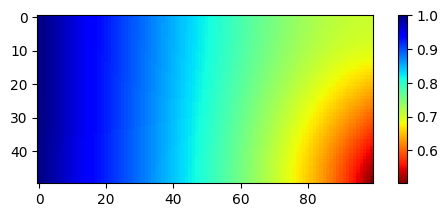

In [18]:
import matplotlib.pyplot as plt

heads = engine.read_flow_head(idx=0, layer=0)
plt.subplot(2, 1, 1)
plt.imshow(heads, cmap='jet_r')
plt.colorbar()
plt.show()